## Phase 1 Project-MICROSOFT MOVIE STUDIO ANALYSIS


* Student name: JULLIET ISWANA
* Student pace:  part time 
* Scheduled project review date/time: 24/07/2023
* Instructor name: ASHA DEEN
* GIT REPOSITORY:https://github.com/Iswana-O/dsc-phase-1-project/tree/master


**OVERVIEW**

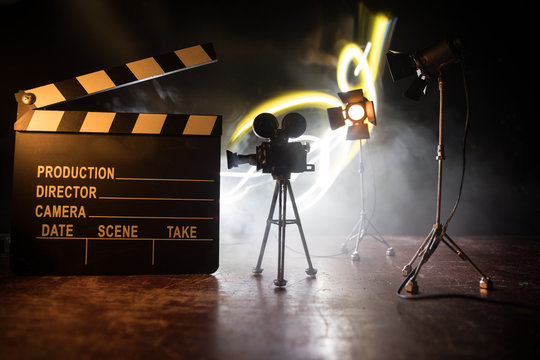

Over-The-Top (OTT) is a media distribution model that has gained popularity in recent years. It allows content providers to deliver television shows, movies, and videos directly to viewers via the Internet, bypassing traditional distribution methods such as broadcast, cable, and satellite TV providers. By using OTT platforms, content creators can reach a global audience without the need for intermediaries, giving them more control over their content and a broader reach. OTT service providers have various ways of acquiring new content to offer to their subscribers. The three primary methods are Purchasing Content, Producing Content, and Licensing content. Each of these approaches has its advantages and challenges. Purchasing existing content can provide immediate access to popular titles while producing original content allows the platform to build a unique brand identity. Licensing content can offer a cost-effective way to expand the content library, but it might come with restrictions or competition from other platforms seeking the same content.

This disruptive distribution model has transformed the media landscape and altered the way audiences consume entertainment content. Major players in this industry are Netflix, Hulu, Disney+, Prime Video, ESPN +, and HBO Max to name but a few. Another Key player interested in this industry is Microsoft who has seen all the big companies creating original video content and they want to get in on the fun. My goal in this project was to analyze box office movies and translate the findings into actionable insights that Microsoft can use in decision-making in regard to their new venture of creating a new movie studio.

**BUSINESS PROBLEM**


Microsoft's decision to venture into the movie industry presents exciting opportunities, but also potential challenges due to their lack of experience in creating films. To ensure a successful entry into this competitive market, it is important for them to understand the types of movies that are currently thriving at the box office. Analysis of the current trends and translating these findings into actionable insights, Microsoft can make informed decisions on the types of films it should produce to maximize its chances of success.


In [33]:
#importing the packages i will be using for the analysis
import ast
#import Pandas
import  pandas as pd

#import Numpy
import numpy as np

# Import matplotlib
import matplotlib.pyplot as plt

# Set plot space as inline for inline plots and qt for external plots
%matplotlib inline

#import seaborn
import seaborn as sns


**MOVIES DATA UNDERSTANDING**

11 Datasets were compiled for the project was compiled by the school from below sources for this analysis:

**_Box Office Mojo_**

**_IMDB_**

**_Rotten Tomatoes_**

**_TheMovieDB_**

**_The Numbers_**

Inorder to understand the data Pandas provided a convenient way to read the CSV and TSV files inform of rows and colummns


In [34]:
#creating variable for the path of my datasets which are in a different location from my notebook

path ='C:\\Users\\Admin\\Documents\\Flatiron\\Phase_ONE\\dsc-phase-1-project\\zippedData\\zippedData\\'

In [35]:
#reading the csv file into a data frame
tmdb_movies_df =pd.read_csv( path + 'tmdb.movies.csv', index_col=0)
tmdb_movies_df.head(2)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [36]:
movie_gross_df=pd.read_csv(path +'bom.movie_gross.csv', index_col = 0)
movie_gross_df.head(2)

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [37]:
name_basics_df =pd.read_csv(path +'name.basics.csv', index_col = 0)
name_basics_df.head(2)

,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


In [38]:
title_akas_df =pd.read_csv(path + 'title.akas.csv', index_col = 0)
title_akas_df.head(2)

,ordering,title,region,language,types,attributes,is_original_title
title_id,,,,,,,
tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0


In [39]:
title_basics_df =pd.read_csv(path +  'title.basics.csv', index_col = 0)
title_basics_df.head(2)

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [40]:
title_basics_df.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [41]:
movie_budgets_df =pd.read_csv(path +'tn.movie_budgets.csv', index_col = 0)
movie_budgets_df.head(2)


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [42]:
title_ratings_df =pd.read_csv(path +'title.ratings.csv', index_col = 0)
title_ratings_df.head(2)


,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559


In [43]:
movie_info_df =pd.read_table(path + 'rt.movie_info.tsv', index_col = 0)
movie_info_df.head(2)

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [44]:
reviews_df =pd.read_table(path +'rt.reviews.tsv', encoding='unicode_escape',index_col = 0)
reviews_df.head(2)

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


In [45]:
title_principals_df =pd.read_csv(path + 'title.principals.csv', index_col = 0)
title_principals_df.head(2)

,ordering,nconst,category,job,characters
tconst,,,,,
tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
tt0111414,2,nm0398271,director,NaN,NaN


In [46]:
title_crew_df =pd.read_csv(path + 'title.crew.csv', index_col = 0)
title_crew_df.head(2)

,directors,writers
tconst,,
tt0285252,nm0899854,nm0899854
tt0438973,NaN,"nm0175726,nm1802864"


printing information about each DataFrame using the info() method and zip() function

to iterate over both the DataFrames and their corresponding names simultaneously.

In [47]:
#printing information about each DataFrame using the info() method 
#zip() function to iterate over both the DataFrames and their corresponding names simultaneously.

datasets_dfs = [movie_gross_df, title_principals_df,title_crew_df,reviews_df,movie_info_df,
                title_ratings_df,movie_budgets_df,tmdb_movies_df,title_basics_df,name_basics_df,title_akas_df]
df_names = ['movie_gross', 'title_principals', 'title_crew','reviews','movie_info','title_ratings',
            'movie_budgets','tmdb_movies','title_basics', 'name_basics', 'title_akas']
for df, name in zip(datasets_dfs, df_names):
    print(name, '\n')
    display(df.info())

movie_gross 

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


None

title_principals 

<class 'pandas.core.frame.DataFrame'>
Index: 1028186 entries, tt0111414 to tt9692684
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   ordering    1028186 non-null  int64 
 1   nconst      1028186 non-null  object
 2   category    1028186 non-null  object
 3   job         177684 non-null   object
 4   characters  393360 non-null   object
dtypes: int64(1), object(4)
memory usage: 47.1+ MB


None

title_crew 

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   directors  140417 non-null  object
 1   writers    110261 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


None

reviews 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 3 to 2000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      48869 non-null  object
 1   rating      40915 non-null  object
 2   fresh       54432 non-null  object
 3   critic      51710 non-null  object
 4   top_critic  54432 non-null  int64 
 5   publisher   54123 non-null  object
 6   date        54432 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.3+ MB


None

movie_info 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.2+ KB


None

title_ratings 

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  73856 non-null  float64
 1   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


None

movie_budgets 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


None

tmdb_movies 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


None

title_basics 

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


None

name_basics 

<class 'pandas.core.frame.DataFrame'>
Index: 606648 entries, nm0061671 to nm9993380
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   primary_name        606648 non-null  object 
 1   birth_year          82736 non-null   float64
 2   death_year          6783 non-null    float64
 3   primary_profession  555308 non-null  object 
 4   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(3)
memory usage: 27.8+ MB


None

title_akas 

<class 'pandas.core.frame.DataFrame'>
Index: 331703 entries, tt0369610 to tt9880178
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ordering           331703 non-null  int64  
 1   title              331703 non-null  object 
 2   region             278410 non-null  object 
 3   language           41715 non-null   object 
 4   types              168447 non-null  object 
 5   attributes         14925 non-null   object 
 6   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 20.2+ MB


None

  **DATA CLEANING**

In [48]:
#Change production_budget, domestic_gross and worldwide_gross to float64
#Remove dollar sign and commas before changing data type

movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].str.replace('$', '')
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].str.replace('$', '')
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].str.replace('$', '')

movie_budgets_df['production_budget'].replace(',', '', regex=True, inplace=True)
movie_budgets_df['domestic_gross'].replace(',', '', regex=True, inplace=True)
movie_budgets_df['worldwide_gross'].replace(',', '', regex=True, inplace=True)

movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].astype('float64')
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].astype('float64')
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].astype('float64')

In [49]:
movie_budgets_df.drop_duplicates(subset=['movie', 'release_date'], keep='first', inplace=True)
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   float64
 3   domestic_gross     5782 non-null   float64
 4   worldwide_gross    5782 non-null   float64
dtypes: float64(3), object(2)
memory usage: 271.0+ KB


In [50]:
title_akas_df.drop(['language', 'attributes', 'types'], axis=1, inplace=True)
title_akas_df.head(2)

,ordering,title,region,is_original_title
title_id,,,,
tt0369610,10,Джурасик свят,BG,0.0
tt0369610,11,Jurashikku warudo,JP,0.0


In [51]:
name_basics_df.drop(['birth_year','death_year'], axis=1, inplace=True)
name_basics_df.head(2)

,primary_name,primary_profession,known_for_titles
nconst,,,
nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


In [52]:
title_principals_df.drop(['job', 'characters'], axis=1, inplace=True)
title_principals_df.head()

,ordering,nconst,category
tconst,,,
tt0111414,1,nm0246005,actor
tt0111414,2,nm0398271,director
tt0111414,3,nm3739909,producer
tt0323808,10,nm0059247,editor
tt0323808,1,nm3579312,actress


**MERGING DATA FRAMES**

In [53]:
tmdb_movies_budgets_df=tmdb_movies_df.merge(movie_budgets_df, left_on='original_title', right_on='movie', how='inner')
tmdb_movies_budgets_df

,genre_ids,id,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"Mar 26, 2010",How to Train Your Dragon,165000000.0,217581232.0,494870992.0
1,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"May 7, 2010",Iron Man 2,170000000.0,312433331.0,621156389.0
2,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"Nov 22, 1995",Toy Story,30000000.0,191796233.0,364545516.0
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"Nov 22, 1995",Toy Story,30000000.0,191796233.0,364545516.0
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"Jul 16, 2010",Inception,160000000.0,292576195.0,835524642.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,[],509316,en,The Box,0.600,2018-03-04,The Box,8.0,1,"Nov 6, 2009",The Box,25000000.0,15051977.0,34356760.0
2312,[10402],509306,en,The Box,0.600,2018-03-04,The Box,6.0,1,"Nov 6, 2009",The Box,25000000.0,15051977.0,34356760.0
2313,"[35, 16]",546674,en,Enough,0.719,2018-03-22,Enough,8.7,3,"May 24, 2002",Enough,38000000.0,39177215.0,50970660.0
2314,[],513161,en,Undiscovered,0.600,2018-04-07,Undiscovered,8.0,1,"Aug 26, 2005",Undiscovered,9000000.0,1069318.0,1069318.0


In [54]:
ratings_df=title_ratings_df.merge(title_crew_df, left_on='tconst', right_on='tconst', how='inner')

In [55]:
ratings_df.head()

,averagerating,numvotes,directors,writers
tconst,,,,
tt10356526,8.3,31,nm8353804,"nm3057599,nm4179342"
tt10384606,8.9,559,"nm9932562,nm9250842",NaN
tt1042974,6.4,20,nm1915232,nm1915232
tt1043726,4.2,50352,nm0001317,"nm0393517,nm0316417,nm0001317,nm1048866"
tt1060240,6.5,21,nm1926349,nm1926349


In [56]:
ratings_basics_df= title_basics_df.merge(ratings_df, left_on='tconst', right_on='tconst', how='inner')
ratings_basics_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers
tconst,,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,NaN
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,nm0000080,"nm0000080,nm0462648"
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,nm0611531,nm0347899
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,"nm0765384,nm0749914","nm1360635,nm0749914"


In [57]:
title_ratings_basics_df= ratings_basics_df.merge(title_principals_df, left_on='tconst', right_on='tconst', how='inner')
title_ratings_basics_df

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers,ordering,nconst,category
tconst,,,,,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",10,nm0006210,composer
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",1,nm0474801,actor
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",2,nm0904537,actress
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",3,nm0756379,actor
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",4,nm0474876,actor
...,...,...,...,...,...,...,...,...,...,...,...,...
tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11,nm5684093,NaN,3,nm2768724,producer
tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11,nm5684093,NaN,4,nm4241788,composer
tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11,nm5684093,NaN,5,nm6969694,cinematographer


**DATA ANALYISIS ON MERGED DATA FRAMES**

Analysis on tmdb_movies_budgets_df seeks to answer key questions that will help microsoft studio make right decisions. i am seeking to understand the most produced genres of movies, correlation between the production budgets and revenue 

In [58]:
descriptive_stats = tmdb_movies_budgets_df[['popularity', 'vote_average', 'vote_count', 'production_budget',
                                            'domestic_gross', 'worldwide_gross']].describe()

print(descriptive_stats)

        popularity  vote_average    vote_count  production_budget  \
count  2316.000000   2316.000000   2316.000000       2.316000e+03   
mean     10.685747      6.206261   1712.143351       3.790108e+07   
std       8.244311      1.178079   2704.578576       5.150964e+07   
min       0.600000      0.000000      1.000000       9.000000e+03   
25%       5.487000      5.600000     63.000000       5.000000e+06   
50%       9.506000      6.300000    615.000000       1.900000e+07   
75%      14.423750      6.900000   2100.500000       4.650000e+07   
max      80.773000     10.000000  22186.000000       4.250000e+08   

       domestic_gross  worldwide_gross  
count    2.316000e+03     2.316000e+03  
mean     4.953869e+07     1.201667e+08  
std      8.261483e+07     2.218496e+08  
min      0.000000e+00     0.000000e+00  
25%      7.788272e+05     3.224914e+06  
50%      2.015790e+07     3.722812e+07  
75%      5.830223e+07     1.248731e+08  
max      7.605076e+08     2.776345e+09  


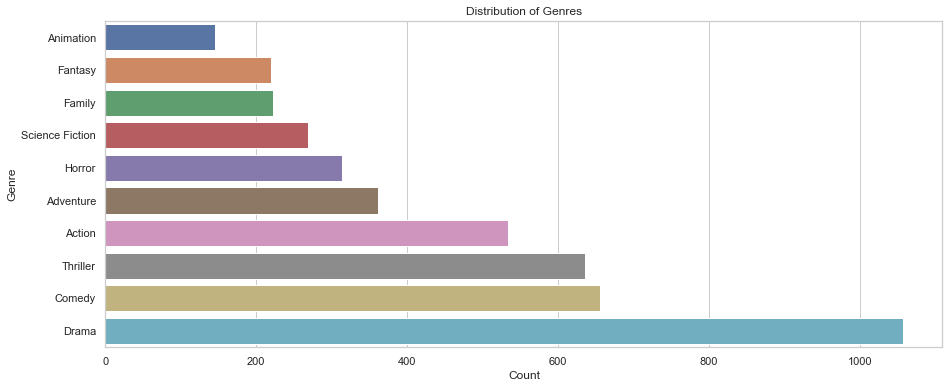

In [59]:
tmdb_movies_budget_df = pd.DataFrame({
    'genre_ids': ["[12, 14, 10751]", "[14, 12, 16, 10751]", "[12, 28, 878]", "[16, 35, 10751]", "[28, 878, 12]"]
})

# Count the occurrences of each genre
genres_count = {}
for genres_list in tmdb_movies_budgets_df['genre_ids']:
    genres_list = ast.literal_eval(genres_list)  # Convert string representation of list to a Python list
    for genre_id in genres_list:
        if genre_id in genres_count:
            genres_count[genre_id] += 1
        else:
            genres_count[genre_id] = 1

# Creating a DataFrame for plotting
genres_df = pd.DataFrame(list(genres_count.items()), columns=['Genre ID', 'Count'])

# Genre mapping for genre names
genre_mapping = {
    12: 'Adventure',
    14: 'Fantasy',
    10751: 'Family',
    16: 'Animation',
    28: 'Action',
    878: 'Science Fiction',
    35: 'Comedy',
    53: 'Thriller',
    27: 'Horror',
    18: 'Drama'
}

# Adding genre names to the DataFrame
genres_df['Genre Name'] = genres_df['Genre ID'].map(genre_mapping)

plt.figure(figsize=(15, 6))
# Sorting by count in ascending order
genres_df.sort_values('Count', ascending=True, inplace=True)

# Plotting using Seaborn
sns.set(style='whitegrid')
sns.barplot(x='Count', y='Genre Name', data=genres_df)

# Display the plot
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Distribution of Genres')
plt.show()

In [67]:
#Create two new columns: gross_profit and profit_margin (Drop any movies with 0 gross revenue)
tmdb_movies_budgets_df['net_profit'] = tmdb_movies_budgets_df['worldwide_gross'] - tmdb_movies_budgets_df['production_budget']
tmdb_movies_budgets_df['profit_margin'] = round(tmdb_movies_budgets_df['net_profit'] / tmdb_movies_budgets_df['worldwide_gross'], 6)
tmdb_movies_budgets_df.profit_margin.replace(-np.inf, np.nan, inplace=True)
tmdb_movies_budgets_df.dropna(inplace=True)
tmdb_movies_budgets_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,net_profit,profit_margin
0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"Mar 26, 2010",How to Train Your Dragon,165000000.0,217581232.0,494870992.0,3,2010,329870992.0,0.666580
1,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"May 7, 2010",Iron Man 2,170000000.0,312433331.0,621156389.0,5,2010,451156389.0,0.726317
2,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"Nov 22, 1995",Toy Story,30000000.0,191796233.0,364545516.0,11,1995,334545516.0,0.917706
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"Nov 22, 1995",Toy Story,30000000.0,191796233.0,364545516.0,11,1995,334545516.0,0.917706
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"Jul 16, 2010",Inception,160000000.0,292576195.0,835524642.0,7,2010,675524642.0,0.808504


In [68]:
tmdb_movies_budgets_df[tmdb_movies_budgets_df['profit_margin'] == tmdb_movies_budgets_df.profit_margin.min()]

,genre_ids,id,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,net_profit,profit_margin
1654,"[28, 35, 878]",367551,en,American Hero,6.56,2015-12-11,American Hero,5.0,93,"Dec 11, 2015",American Hero,1000000.0,0.0,26.0,12,2015,-999974.0,-38460.538462


In [69]:
#Sort by gross_profit to see most successful movies
top_30_net_profit = tmdb_movies_budgets_df.sort_values(by='net_profit', ascending=False)[:30]

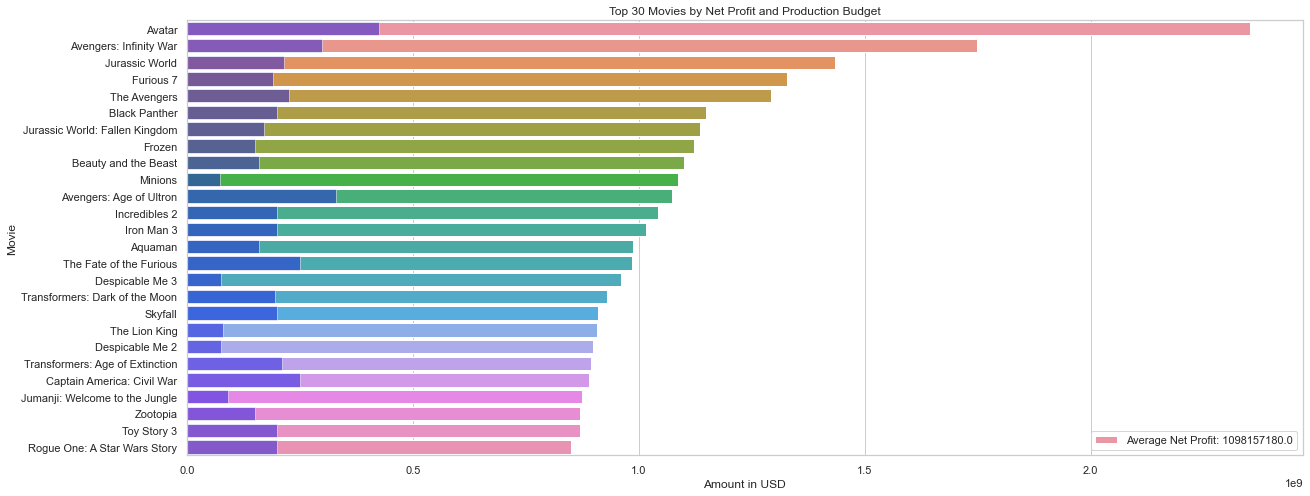

In [70]:
plt.figure(figsize=(20, 8))
sns.set(style='whitegrid')

# Plotting the bar chart for net profit
sns.barplot(x='net_profit', y='movie', data=top_30_net_profit,
            label='Average Net Profit: {}'.format(round(top_30_net_profit['net_profit'].mean(), 0)))

# Plotting the bar chart for production budget (overlayed on the net profit bars)
sns.barplot(x='production_budget', y='movie', data=top_30_net_profit, color='blue', alpha=0.5)

plt.xlabel('Amount in USD')
plt.ylabel('Movie')
plt.title('Top 30 Movies by Net Profit and Production Budget')
plt.legend()

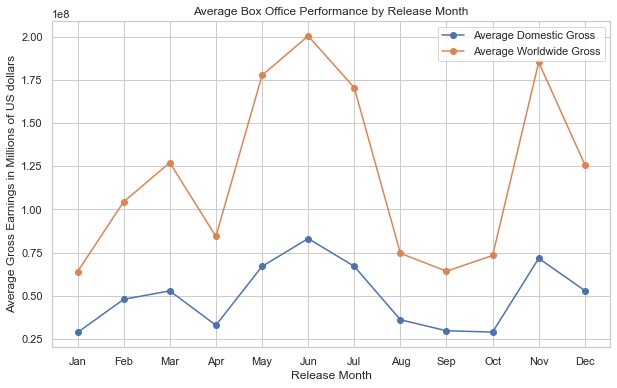

In [60]:

# Convert 'production_budget', 'domestic_gross', and 'worldwide_gross' columns to numeric
tmdb_movies_budgets_df ['production_budget'] = tmdb_movies_budgets_df ['production_budget'].replace('[\$,]', '', regex=True).astype(float)
tmdb_movies_budgets_df ['domestic_gross'] =tmdb_movies_budgets_df ['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
tmdb_movies_budgets_df ['worldwide_gross'] = tmdb_movies_budgets_df ['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Extract month and year from the 'release_date' column
tmdb_movies_budgets_df ['release_month'] = pd.to_datetime(tmdb_movies_budgets_df ['release_date_y']).dt.month
tmdb_movies_budgets_df ['release_year'] = pd.to_datetime(tmdb_movies_budgets_df ['release_date_y']).dt.year

# Group the data by release month and calculate the average domestic and worldwide gross
monthly_avg_gross = tmdb_movies_budgets_df .groupby('release_month').agg({
    'domestic_gross': 'mean',
    'worldwide_gross': 'mean'
}).reset_index()

# Sort the data by release month for proper plotting
monthly_avg_gross = monthly_avg_gross.sort_values('release_month')

# Data Visualization
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_gross['release_month'], monthly_avg_gross['domestic_gross'], marker='o', label='Average Domestic Gross')
plt.plot(monthly_avg_gross['release_month'], monthly_avg_gross['worldwide_gross'], marker='o', label='Average Worldwide Gross')
plt.xlabel('Release Month')
plt.ylabel('Average Gross Earnings in Millions of US dollars')
plt.title('Average Box Office Performance by Release Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()








 The Best time to produce movies is during USA summer as from MAY

Correlation coefficient between production budget and domestic gross: 0.7208697711690233


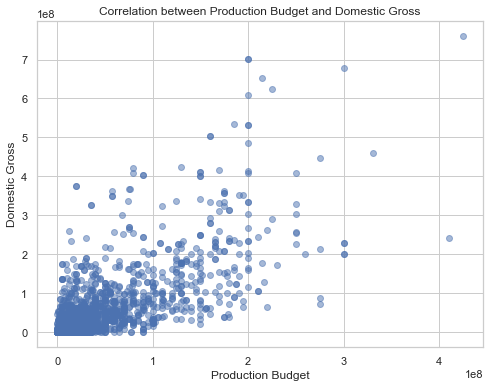

In [61]:
# Create a new DataFrame with only the 'production_budget' and 'domestic_gross' columns
budget_domestic_df = tmdb_movies_budgets_df[['production_budget', 'domestic_gross']]

# Dropping rows with missing data (if any)
budget_domestic_df = budget_domestic_df.dropna()

# Convert the columns to numeric types
budget_domestic_df['production_budget'] = pd.to_numeric(budget_domestic_df['production_budget'].astype(str).str.replace('[^\d.]', ''), errors='coerce')
budget_domestic_df['domestic_gross'] = pd.to_numeric(budget_domestic_df['domestic_gross'].astype(str).str.replace('[^\d.]', ''), errors='coerce')

# Drop any rows where the conversion resulted in NaN (not-a-number)
budget_domestic_df = budget_domestic_df.dropna()

# Calculating the correlation coefficient
correlation_coefficient = budget_domestic_df['production_budget'].corr(budget_domestic_df['domestic_gross'])

print("Correlation coefficient between production budget and domestic gross:", correlation_coefficient)

# Visualizing the relationship with a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(budget_domestic_df['production_budget'], budget_domestic_df['domestic_gross'], alpha=0.5)
plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross')
plt.title('Correlation between Production Budget and Domestic Gross')
plt.grid(True)
plt.show()

Correlation coefficient between production budget and worldwide gross: 0.7973439533486282


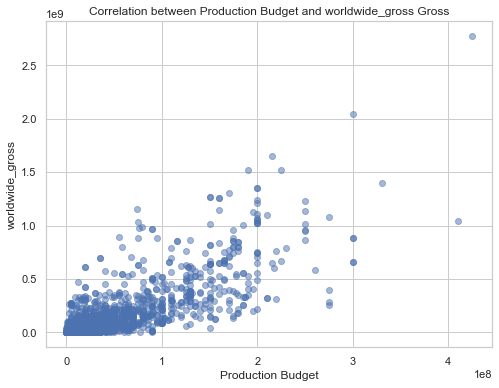

In [62]:
# Create a new DataFrame with only the 'production_budget' and 'domestic_gross' columns
budget_worldwide_df = tmdb_movies_budgets_df[['production_budget', 'worldwide_gross']]

# Dropping rows with missing data (if any)
budget_worldwide_df = budget_worldwide_df.dropna()

# Convert the columns to numeric types
budget_worldwide_df['production_budget'] = pd.to_numeric(budget_worldwide_df['production_budget'].astype(str).str.replace('[^\d.]', ''), errors='coerce')
budget_worldwide_df['worldwide_gross'] = pd.to_numeric(budget_worldwide_df['worldwide_gross'].astype(str).str.replace('[^\d.]', ''), errors='coerce')

# Drop any rows where the conversion resulted in NaN (not-a-number)
budget_worldwide_df = budget_worldwide_df.dropna()

# Calculating the correlation coefficient
correlation_coefficient = budget_worldwide_df['production_budget'].corr(budget_worldwide_df['worldwide_gross'])

print("Correlation coefficient between production budget and worldwide gross:", correlation_coefficient)

# Visualizing the relationship with a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(budget_worldwide_df['production_budget'], budget_worldwide_df['worldwide_gross'], alpha=0.5)
plt.xlabel('Production Budget')
plt.ylabel('worldwide_gross')
plt.title('Correlation between Production Budget and worldwide_gross Gross')
plt.grid(True)
plt.show()


Positive Correlation: The positive sign indicates that there is a positive relationship between the two variables. As the production budget increases, the domestic gross tends to increase as well. This suggests that movies with higher production budgets are more likely to generate higher domestic grosses at the box office. Like the domestic gross the positive sign indicates a positive relationship between the production budget and the worldwide gross which tends to increase as when production budget increases. This implies that movies with higher production budgets are more likely to generate higher worldwide grosses at the box office.

The strong positive correlation between production budget and worldwide gross can be seen as an opportunity for microsoft movie studios. Allocating larger budgets to movies with higher potential can lead to increased worldwide grosses and better returns on investment.While a strong correlation indicates a robust relationship between the variables, it does not mean that one variable directly causes the other to change. Additional analysis and consideration of various factors are necessary to make informed decisions in the film industry.

**Language Analysis**
Explore the performance of movies based on their original language, considering metrics such as popularity, vote_average, and vote_count.

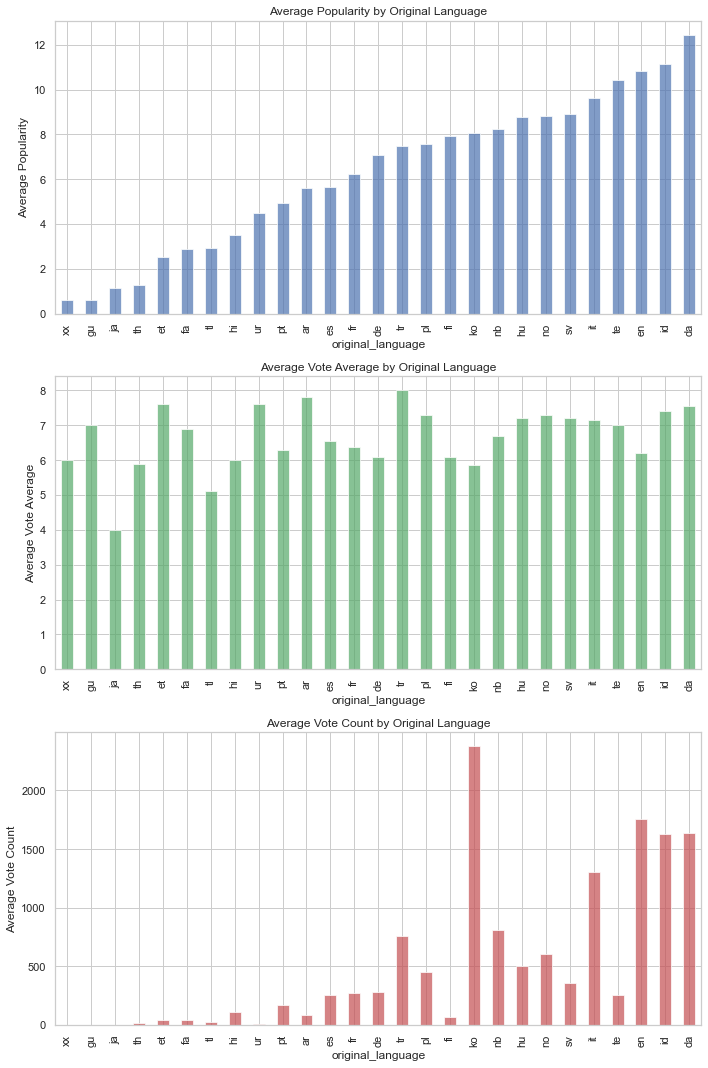

In [63]:
# Group the tmdb_movies_budgets_df  by 'original_language'
language_grouped = tmdb_movies_budgets_df.groupby('original_language')

# Calculate the average popularity, vote_average, and vote_count for each language group
language_stats = language_grouped[['popularity', 'vote_average', 'vote_count']].mean()

# Sort the DataFrame by average popularity to find the most popular languages
language_stats = language_stats.sort_values(by='popularity', ascending=True)

# Plot the language analysis results
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
language_stats['popularity'].plot(kind='bar', ax=axes[0], color='b', alpha=0.7)
axes[0].set_ylabel('Average Popularity')
axes[0].set_title('Average Popularity by Original Language')

language_stats['vote_average'].plot(kind='bar', ax=axes[1], color='g', alpha=0.7)
axes[1].set_ylabel('Average Vote Average')
axes[1].set_title('Average Vote Average by Original Language')

language_stats['vote_count'].plot(kind='bar', ax=axes[2], color='r', alpha=0.7)
axes[2].set_ylabel('Average Vote Count')
axes[2].set_title('Average Vote Count by Original Language')

plt.tight_layout()
plt.show()

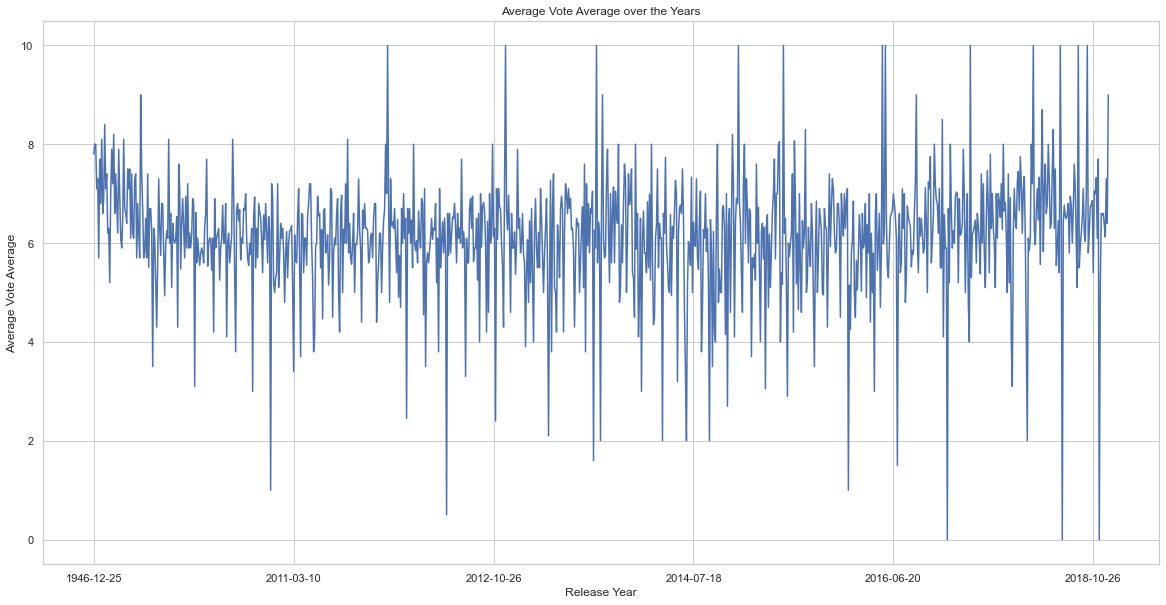

In [64]:

# Group the merged DataFrame by the relevant columns (e.g., 'genre_ids', 'release_year', 'production_budget')
grouped_by_genre = tmdb_movies_budgets_df.groupby('genre_ids')
grouped_by_year = tmdb_movies_budgets_df.groupby('release_date_x')
grouped_by_budget = tmdb_movies_budgets_df.groupby('production_budget')

# Calculate relevant metrics for each group
# Example: average popularity, vote_average, vote_count, revenue-to-budget ratio, etc.
genre_stats = grouped_by_genre[['popularity', 'vote_average', 'vote_count']].mean()
year_stats = grouped_by_year[['popularity', 'vote_average', 'vote_count']].mean()
budget_stats = grouped_by_budget[['popularity', 'vote_average', 'vote_count']].mean()

# Example: Line plot for average vote_average over the years
year_stats['vote_average'].plot(kind='line', figsize=(20, 10))
plt.xlabel('Release Year')
plt.ylabel('Average Vote Average')
plt.title('Average Vote Average over the Years')
plt.show()
